In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read csv
df = pd.read_csv('Olivia Rodrigo Spotify Data Version 2.csv')
df.head()

,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,...,track_number,type,track_uri,is_local,external_urls.spotify,album_name,restrictions.reason,key_name,mode_name,key_mode
0,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,40YjPXmE1d3ajv2dcU2Bhx,single,2016-10-07,2016,day,0.688,0.646,9,...,1,track,spotify:track:4lssBDAmUk4e7rv2ajY6H6,False,https://open.spotify.com/track/4lssBDAmUk4e7rv...,Bizaardvark (Music from the TV Series),NaN,A,major,A major
1,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,40YjPXmE1d3ajv2dcU2Bhx,single,2016-10-07,2016,day,0.523,0.536,8,...,2,track,spotify:track:0YtQVibEZJ5IPYw6dm0nFJ,False,https://open.spotify.com/track/0YtQVibEZJ5IPYw...,Bizaardvark (Music from the TV Series),NaN,G#,major,G# major
2,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,40YjPXmE1d3ajv2dcU2Bhx,single,2016-10-07,2016,day,0.759,0.792,4,...,3,track,spotify:track:1glFzU55j6ji6xYEMlvEUx,False,https://open.spotify.com/track/1glFzU55j6ji6xY...,Bizaardvark (Music from the TV Series),NaN,E,major,E major
3,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,40YjPXmE1d3ajv2dcU2Bhx,single,2016-10-07,2016,day,0.805,0.715,1,...,4,track,spotify:track:2WLp3CjnM7iLR7aTrNdwcX,False,https://open.spotify.com/track/2WLp3CjnM7iLR7a...,Bizaardvark (Music from the TV Series),NaN,C#,major,C# major
4,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,4dPtBNViH8bSO5Xe6MRsfF,single,2016-11-11,2016,day,0.746,0.867,9,...,1,track,spotify:track:5fvrAgYWC8D63PYqJNh3tf,False,https://open.spotify.com/track/5fvrAgYWC8D63PY...,"Let It Glow (From ""Frozen Northern Lights"")",NaN,A,minor,A minor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11512 entries, 0 to 11511
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   artist_name                   11512 non-null  object 
 1   artist_id                     11512 non-null  object 
 2   album_id                      11512 non-null  object 
 3   album_type                    11512 non-null  object 
 4   album_release_date            11512 non-null  object 
 5   album_release_year            11512 non-null  int64  
 6   album_release_date_precision  11512 non-null  object 
 7   danceability                  11512 non-null  float64
 8   energy                        11512 non-null  float64
 9   key                           11512 non-null  int64  
 10  loudness                      11512 non-null  float64
 11  mode                          11512 non-null  int64  
 12  speechiness                   11512 non-null  float64
 13  a

# 1) Display the relationship between 'acousticness' and 'energy'.


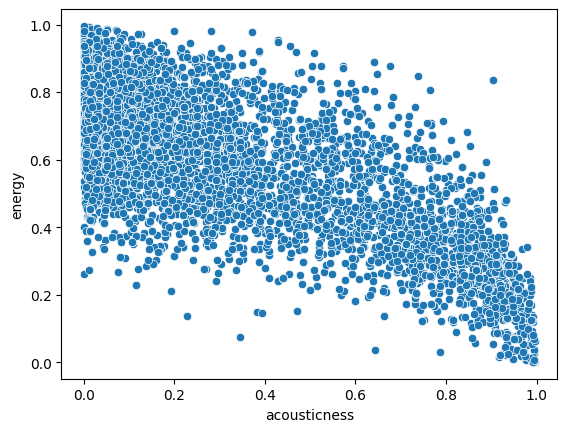

In [ ]:
sns.scatterplot(data=df, x='acousticness', y='energy')
plt.show()

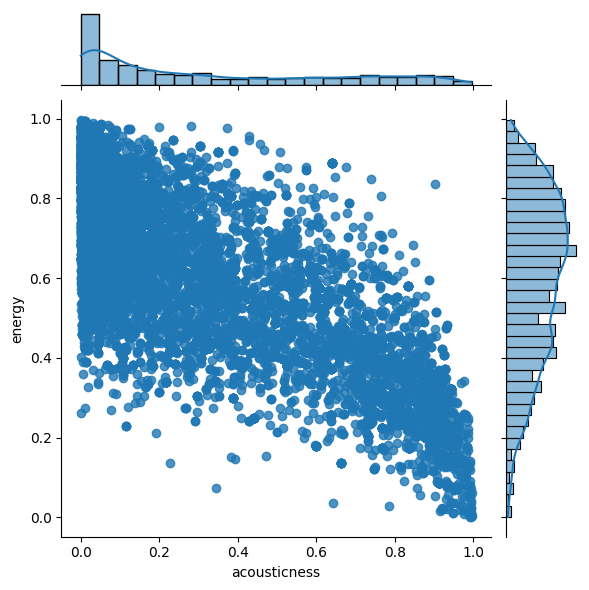

In [ ]:
sns.jointplot(data=df, x='acousticness', y='energy', kind='reg')
plt.show()

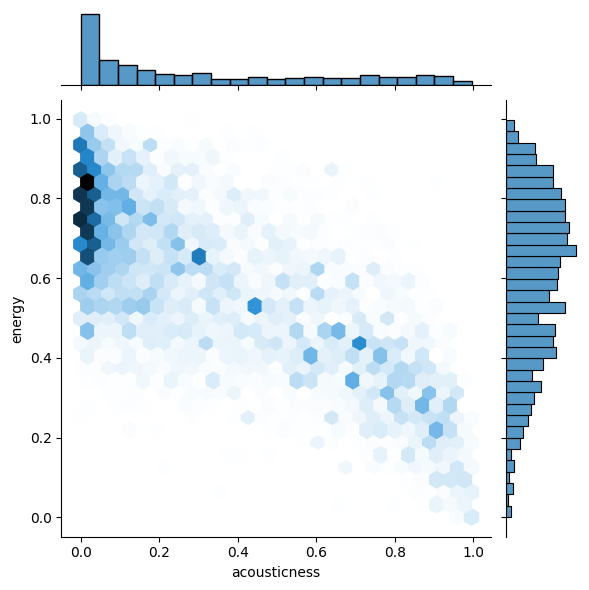

In [ ]:
sns.jointplot(data=df, x='acousticness', y='energy', kind='hex')
plt.show()

# 2) Perform time series visualization for 'tempo'.

In [ ]:
# Group by 'album_release_date' to calculate the average tempo for all albums released on that date
df2 = df.groupby('album_release_date').agg(
    avg_tempo=('tempo', 'mean')
).reset_index()

# Display the new dataframe
df2.head()

,album_release_date,avg_tempo
0,2016-10-07,133.396250
1,2016-11-11,119.830000
2,2017-11-03,118.390158
3,2019-11-08,102.152500
4,2019-11-12,129.385000


In [ ]:
# IMPORTANT ⚠️
# Convert to datetime
df2['album_release_date'] = pd.to_datetime(df2['album_release_date'])

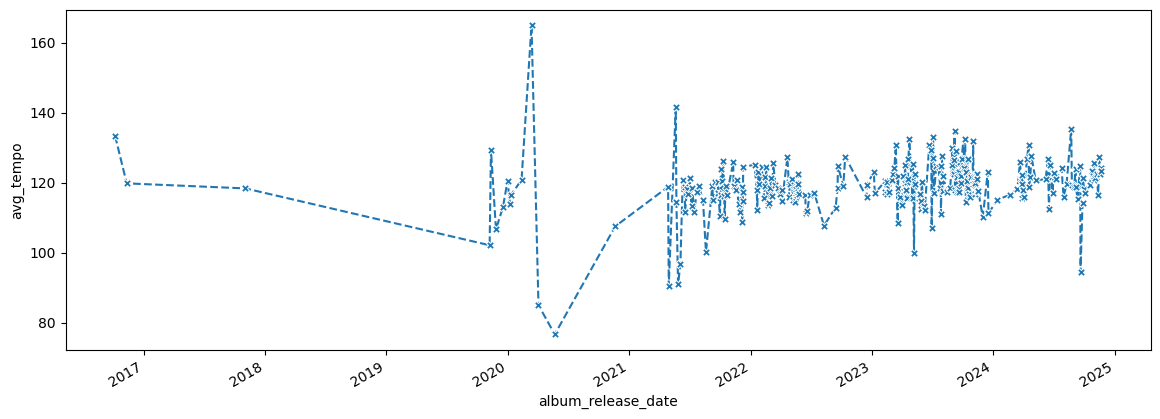

In [ ]:
# Time Series with Seaborn
plt.figure(figsize=(14, 5))
sns.lineplot(data=df2, x='album_release_date', y='avg_tempo', marker='X', markersize=6, linestyle='--')
plt.gcf().autofmt_xdate()
plt.show()

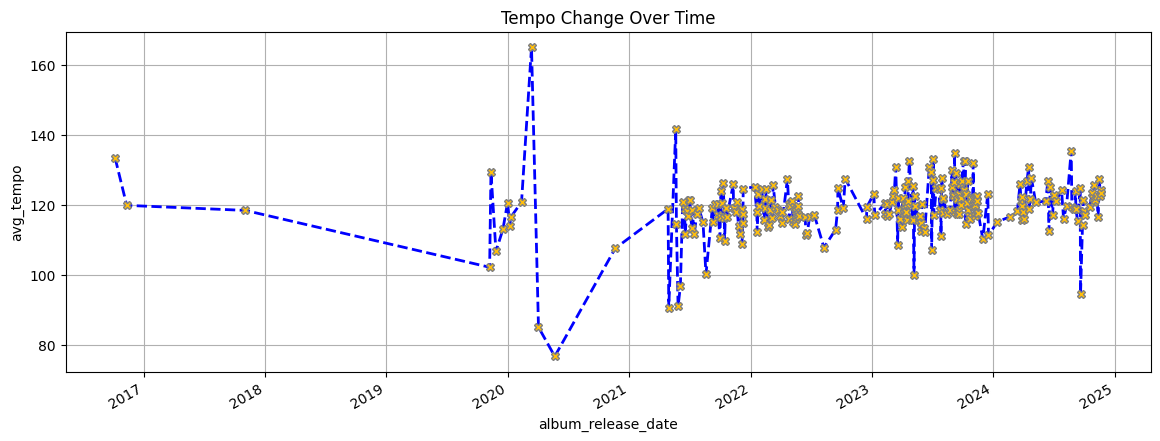

In [ ]:
# Time Series with Matplotlib
plt.figure(figsize=(14, 5))
plt.plot_date(x=df2['album_release_date'], y = df2['avg_tempo'], linewidth=2,
c='blue', markersize=6, mfc='#ffbe0b', mec='grey', fmt='X--',)
plt.gcf().autofmt_xdate()
plt.xlabel('album_release_date')
plt.ylabel('avg_tempo')
plt.grid()
plt.title('Tempo Change Over Time')
plt.show()

# 3) Select a proper visualization tool to show how 'danceability' is distributed upon 'mode_name'.

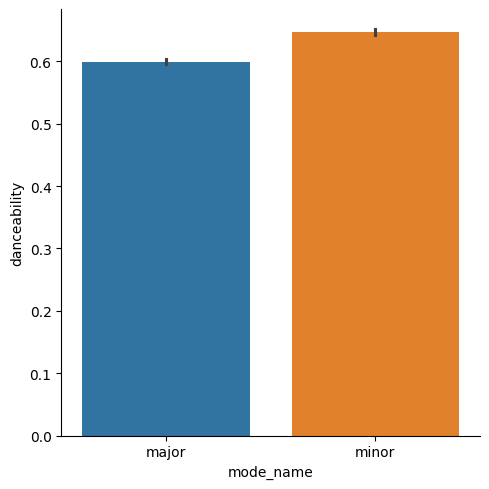

In [ ]:
# visualize the danceability across mode_name by using bar
sns.catplot(data=df, x='mode_name', y='danceability', kind='bar', hue='mode_name')
plt.show()

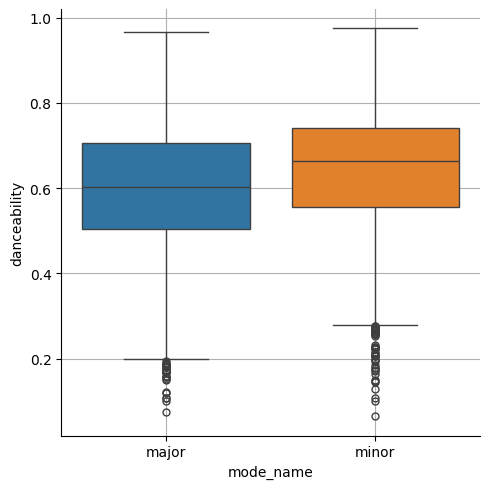

In [ ]:
# visualize the danceability across mode_name by using grouped boxplot
sns.catplot(data=df, x='mode_name', y='danceability', kind='box', hue='mode_name')
plt.grid(True)
plt.show()

# 4) Analytical Models

In [ ]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import logit

In [ ]:
# Step 2: Prepare the target variable (explicit)
# Why it's important: Logistic regression requires a binary target variable in numeric form.
df['explicit'] = df['explicit'].astype(int)
df['explicit'].head()

,explicit
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Step 3: Explore the relationship and prepare features
df['danceability_squared'] = df['danceability']**2
X = df[['danceability', 'danceability_squared']]
y = df['explicit']

In [ ]:
# Step 4: Fit the LogisticRegression model
# Why this step is needed: To predict the probability of a track being explicit.
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
# Step 5: Predict probabilities
# danceability_range: Creates an evenly spaced range of danceability values to visualize predictions.
danceability_range = np.linspace(df['danceability'].min(), df['danceability'].max(), 500)
# predict_proba: Predicts the probability of the explicit label (1) for each value in danceability_range.
pred_prob = model.predict_proba(np.column_stack((danceability_range, danceability_range ** 2)))[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


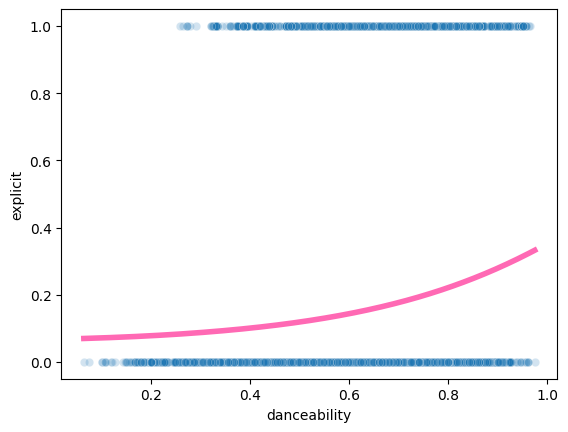

In [ ]:
# Step 6: Visualize predictions with LogisticRegression
# Scatterplot: Shows the actual data points (danceability vs. explicit).
sns.scatterplot(data=df, x='danceability', y='explicit', alpha=0.2)
# Line plot: Overlays the predicted probabilities for the range of danceability values.
plt.plot(danceability_range, pred_prob, color='hotpink', linewidth=4)
plt.show()

In [ ]:
# Step 7: Fit and summarize using statsmodels logistic regression
formula = 'explicit ~ danceability + danceability_squared'
# Fits a logistic regression model using the specified formula (explicit ~ danceability + danceability_squared).
model = logit(formula=formula, data=df).fit()
# Outputs statistical details (coefficients, p-values, etc.).
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.427037
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               explicit   No. Observations:                11512
Model:                          Logit   Df Residuals:                    11509
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                 0.01906
Time:                        02:29:44   Log-Likelihood:                -4916.0
converged:                       True   LL-Null:                       -5011.6
Covariance Type:            nonrobust   LLR p-value:                 3.263e-42
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.8766      0.335     -5.594      0.000      -2.534      -1.219

In [ ]:
# Step 8: Predict probabilities with statsmodels
# To predict probabilities with the statsmodels logistic regression model for comparison.
danceability_values = np.linspace(df['danceability'].min(), df['danceability'].max(), 300)
danceability_squared_values = danceability_values**2
X_new = pd.DataFrame({'danceability': danceability_values, 'danceability_squared':danceability_squared_values})
X_new.head()

,danceability,danceability_squared
0,0.065200,0.004251
1,0.068243,0.004657
2,0.071286,0.005082
3,0.074328,0.005525
4,0.077371,0.005986


In [ ]:
# predict probabilities
predicted_probs = model.predict(X_new)

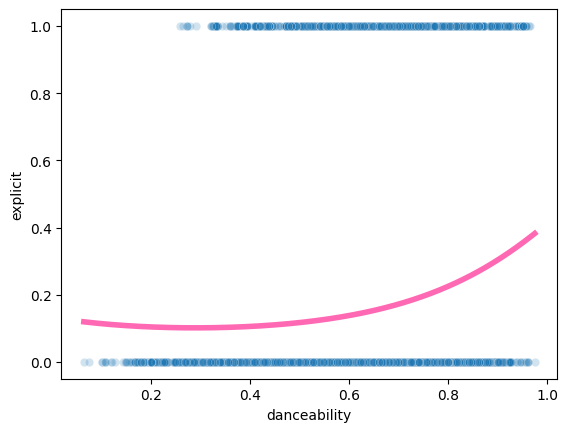

In [ ]:
# Step 9: Combine predictions and real data in visualization
sns.scatterplot(data=df, x='danceability', y='explicit', alpha=0.2)
plt.plot(danceability_values, predicted_probs, color='hotpink', linewidth=4)
plt.show()

In [ ]:
# Step 10: Visualize random trajectory
# What it does: Generates and visualizes a random trajectory in a 2D space.
# generate step length for 200 steps
n_steps = 300
# steps for x-axis
x_steps = np.random.normal(size=n_steps)
# steps for y_axis
y_steps = np.random.normal(size=n_steps)

In [ ]:
# accumulate all the steps to form trajectory
x = np.cumsum(x_steps)
y = np.cumsum(y_steps)

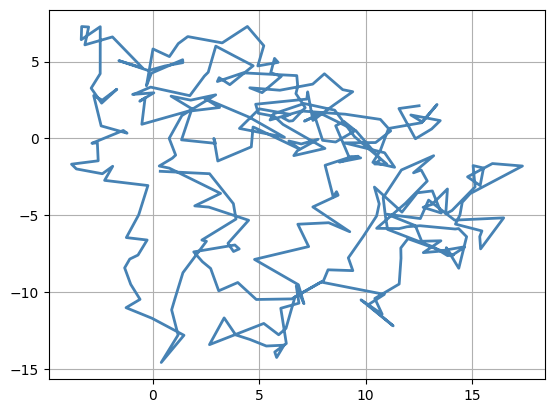

In [ ]:
# visualize the trajectory
plt.plot(x, y, color='steelblue', linewidth=2)
plt.grid()
plt.show()